In [7]:
import numpy as np
import tensorflow as tf
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thijani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
documents=[
    'Deep learning is a subset of machine learning.',
    'Self-Organising maps are a type of neural network.',
    'Natural Language Processing is a field of AI.',
    'Convolutional Networks are used in image processing.',
    'Recurrent Neural Networks work well for sequential data.'
]

In [10]:
vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(documents).toarray()

In [11]:
map_size=(4,4)
input_dim=data.shape[1]
learning_rate=0.5
epochs=100

In [12]:
weights=tf.Variable(tf.random.normal([map_size[0],map_size[1],input_dim]))

In [13]:
def find_bmu(sample):
    sample=tf.cast(sample,tf.float32)
    expanded_sample=tf.expand_dims(tf.expand_dims(sample,0),0)
    distances=tf.reduce_sum(tf.square(weights-expanded_sample),axis=2)
    bmu_index=tf.argmin(tf.reshape(distances,[-1]))
    bmu_x=bmu_index//map_size[1]
    bmu_y=bmu_index%map_size[1]
    return tf.stack([bmu_x,bmu_y])

In [14]:
for epoch in range(epochs):
    for sample in data:
        sample=tf.cast(sample,tf.float32)
        bmu=find_bmu(sample)
        bmu_x,bmu_y=bmu[0],bmu[1]

In [15]:
for x in range(map_size[0]):
    for y in range(map_size[1]):
        distance=tf.sqrt(tf.cast((bmu_x- x)**2 + (bmu_y-y)**2,tf.float32))
        influence=tf.exp(-distance/(2*learning_rate**2))
        weights[x,y].assign(weights[x,y]+influence*(sample-weights[x,y]))

In [16]:
learning_rate*=0.99

In [17]:
som_map=np.zeros(map_size)
for i,sample in enumerate(data):
    bmu=find_bmu(sample)
    x,y=bmu.numpy()
    som_map[x,y]=i+1

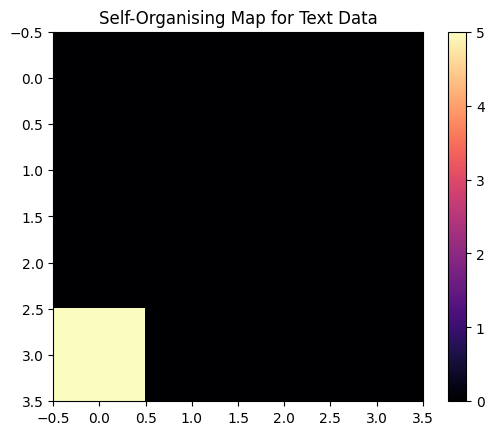

In [18]:
plt.imshow(som_map,cmap='magma',interpolation='nearest')
plt.colorbar()
plt.title("Self-Organising Map for Text Data")
plt.show()

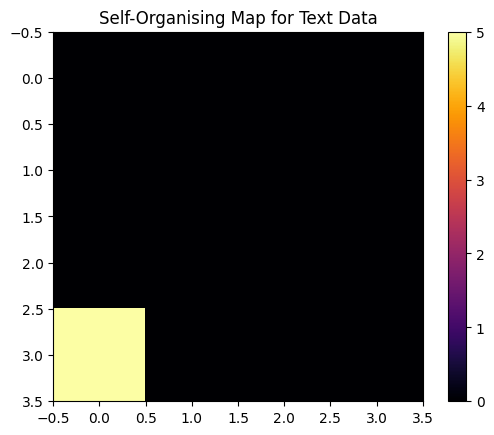

In [20]:
plt.imshow(som_map,cmap='inferno',interpolation='nearest')
plt.colorbar()
plt.title("Self-Organising Map for Text Data")
plt.show()

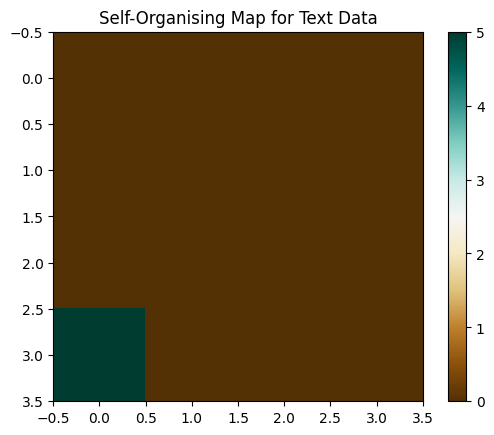

In [21]:
plt.imshow(som_map,cmap='BrBG',interpolation='nearest')
plt.colorbar()
plt.title("Self-Organising Map for Text Data")
plt.show()

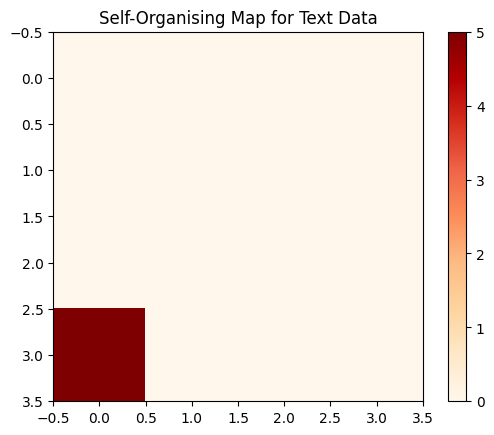

In [23]:
plt.imshow(som_map,cmap='OrRd',interpolation='nearest')
plt.colorbar()
plt.title("Self-Organising Map for Text Data")
plt.show()

In [19]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri